# Kevin Martin CIS600 - Sunday @ 9:00pm EST

HW2: Decision Tree Induction and Model Performance Evaluation



**Outline:**
1. [Business Objectives](#Businessobjectives)
2. [Data Understanding](#Dataunderstanding)
3. [Data Preparation](#Datapreparation)
4. [Model Training/Testing](#Modeltrain)
5. [Prediction](#Prediction)
6. [Conclusion](#Conclusion)

# 1. Business Objectives <a class="anchor" id="Businessunderstanding"></a>
In this excersie, I will use a Decision Tree induction algorithm to predict whether or not a given city will experience rain the following day. The data is already organized in a way to help facilitate this, however the accuracy of the next day predicition is certainly unknown. 

I will first investigate the data further under the CRISP-DM framework, using common Python libraries (as described in Section 2) to help understanding where there might be errors and/or meaningfully missing data. After, I will perform a classification using a Decision Tree approach with "stock" parameters. Finally, I will try to tune the model to achieve better accuracy (as defined in Section 4).  

## 1.1 Preliminary Assessment<a class="anchor" id="Assessthecurrentsituation"></a>

Given there are over 50,000 records and 16 columns of training data, there appears to be a complete picture of the weather patterns in question. At the very least, multiple options are available to asses the both the quality of the data and any patterns that may emerge.

 ## 1.2 Desired Outputs <a class="anchor" id="Desiredoutputs"></a>


**Business success criteria**
- Identifying attributes that are more likely to predict whether or not rain is likely
- Provide further insight into how strong these attributes correlate to the predicition



**Data mining success criteria**
- Clean and prepare the data so no false conclusions are reached (avoiding the "garbage-in-garbage-out" paradigm)
- Avoid erroneous patterns and bring errors down to an acceptable level

 ## 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

- Our ultimate goal is to predict whether or not it will rain in a given location the following day.

# 2. Data Understanding <a class="anchor" id="Dataunderstanding"></a>

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>
Data provided by professor, in a formatted CSV file. As the data has been purposely setup for the assignment, no issues noted with the initial acquisition. 

In [2]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from numpy import nan
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut

In [3]:
#Data source: 
#Source Query location: 
test_data = '/home/kebin/Syracuse/Syracuse/CIS600/HW2/WeatherForecastTesting.csv'
train_data = '/home/kebin/Syracuse/Syracuse/CIS600/HW2/WeatherForecastTraining.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df_test =  pd.read_csv(test_data, sep=',') 
df_train =  pd.read_csv(train_data, sep=',') 

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>
The data has 15 columns and plenty of individual to train the models. Note that the Training Data set has the extra column of "RainTomorrow" which is of course the target feature. The Testing Data set is (correctly) omitting this column, but also has a column at the start "ID" which is just an individual record identifier. I will add the same to the training set, thus it will have one extra column.

For brevity, I will present the generic metrics on just the training data.

In [4]:
#This will validate our initial observation of the amount of unique records as well as attributes/column
print('Test data:')
print(df_test.shape)
print('Training data:')
print(df_train.shape)

Test data:
(12994, 16)
Training data:
(51978, 17)


In [5]:
print('Test data:')
print(df_test.describe())

Test data:
                 ID       MinTemp       MaxTemp      Rainfall  Evaporation  \
count  12994.000000  12947.000000  12976.000000  12833.000000  7478.000000   
mean    6497.500000     12.497969     22.491685      3.650495     5.148930   
std     3751.189034      6.388597      7.099027     11.031150     4.021726   
min        1.000000     -6.500000     -3.700000      0.000000     0.000000   
25%     3249.250000      7.900000     17.300000      0.000000     2.400000   
50%     6497.500000     12.100000     21.700000      0.000000     4.400000   
75%     9745.750000     17.100000     27.400000      2.200000     7.000000   
max    12994.000000     29.700000     46.900000    367.600000    86.200000   

          Sunshine  WindGustSpeed     WindSpeed      Humidity      Pressure  \
count  6900.000000   12074.000000  12733.000000  12645.000000  11701.000000   
mean      6.577928      42.016730     19.078379     57.240490   1014.200752   
std       3.933243      14.741531      9.200108  

In [6]:
# We can now look a little more closely at the columns and see the data types as well as potential missing data
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51978 entries, 0 to 51977
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             51978 non-null  int64  
 1   Location       51978 non-null  object 
 2   MinTemp        51694 non-null  float64
 3   MaxTemp        51849 non-null  float64
 4   Rainfall       51231 non-null  float64
 5   Evaporation    29425 non-null  float64
 6   Sunshine       27103 non-null  float64
 7   WindGustDir    48380 non-null  object 
 8   WindGustSpeed  48407 non-null  float64
 9   WindDir        50465 non-null  object 
 10  WindSpeed      50954 non-null  float64
 11  Humidity       50549 non-null  float64
 12  Pressure       46912 non-null  float64
 13  Cloud          31848 non-null  float64
 14  Temp           50915 non-null  float64
 15  RainToday      51231 non-null  object 
 16  RainTomorrow   51978 non-null  object 
dtypes: float64(11), int64(1), object(5)
memory usage: 

## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>


### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
The data was mostly complete. Using the below  code, we can see that 14 of the 16 columns have missing data. Furthermore, and importantly, no column had over 50% data missing. This is consistent between both the training and testing data. Thus, none of the columns needed to be removed. Of course we don't want to remove information, however if there was a high percentage of missing values in a single field, we would want to exclude from our evenutal model. Again, that was not the case here.


In [7]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("\nThe selections has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
print(missing_values_table(df_test))
print(missing_values_table(df_train))


The selections has 16 columns.
There are 14 columns that have missing values.
               Missing Values  % of Total Values
Sunshine                 6094               46.9
Evaporation              5516               42.5
Cloud                    5020               38.6
Pressure                 1293               10.0
WindGustDir               929                7.1
WindGustSpeed             920                7.1
WindDir                   387                3.0
Humidity                  349                2.7
Temp                      267                2.1
WindSpeed                 261                2.0
Rainfall                  161                1.2
RainToday                 161                1.2
MinTemp                    47                0.4
MaxTemp                    18                0.1

The selections has 17 columns.
There are 14 columns that have missing values.
               Missing Values  % of Total Values
Sunshine                24875               47.9
Evaporati

In [8]:
# Get the columns with > 50% missing
missing_train = missing_values_table(df_train);
miss_col_train = list(missing_train[missing_train['% of Total Values'] > 50].index)
print('There are %d columns missing more than half the data.' % len(miss_col_train))
missing_test = missing_values_table(df_test);
miss_col_test = list(missing_test[missing_test['% of Total Values'] > 50].index)
print('\nThere are %d columns missing more than half the data.' % len(miss_col_test))


The selections has 17 columns.
There are 14 columns that have missing values.
There are 0 columns missing more than half the data.

The selections has 16 columns.
There are 14 columns that have missing values.

There are 0 columns missing more than half the data.


### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>
To address outliers, we will look at a couple of potentially key fields that are of the ratio type. Specifically, temperature for both the testing and training data sets, just to make sure we are seeing similar patterns.

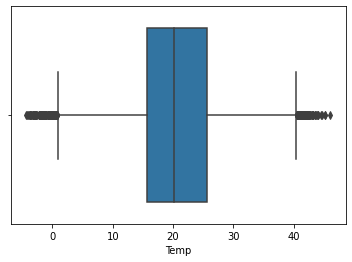

In [9]:
# Temp (train) outliers check
frame_train = pd.DataFrame(df_train)
sns.boxplot(x=frame_train['Temp'])
plt.show()

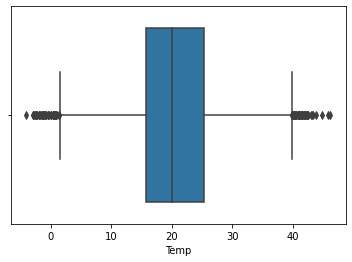

In [10]:
# Temp (test) outliers check
frame_test = pd.DataFrame(df_test)
sns.boxplot(x=frame_test['Temp'])
plt.show()

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>
For a quick visual look at our key attribute of Attrition, consider a simple histogram. It is immediately clear that the vast majority of employees do not leave. This will help tailor our further investigation, as well as alert us that negative bias may be present as the data is not very "balanced". That is fine, but we must be aware. 

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

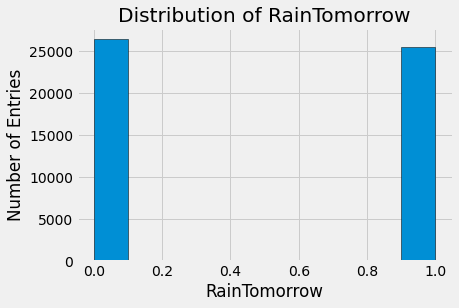

In [11]:
# Histogram
df2 = pd.DataFrame(df_train)
df2['RainTomorrow'] = df2['RainTomorrow'].astype('category').cat.codes
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries'); 
        plt.title('Distribution of '+col);
        plt.show()

        
hist_chart(df2, 'RainTomorrow')

### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>
To get a general sense of corrleations, a heatmap across all vairables as compared to all others was generated. Clearly, there are some moderatey correlated attributes, but to the point of attrition, a more focused list of correlations was generated. Here, we can see the more relevant relationships and begin to map out where the focus of the analysis will be directed. 

<Figure size 1440x1440 with 0 Axes>

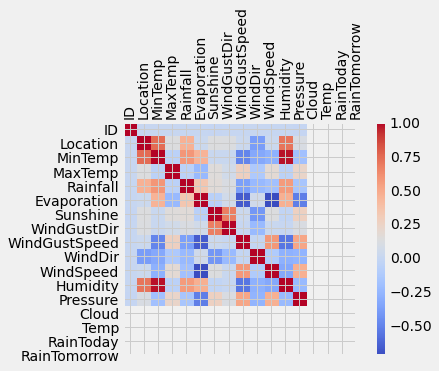

In [12]:
fig=plt.figure(figsize=(18, 18), dpi= 80, facecolor='w', edgecolor='k')
corr = df_train.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(corr,cmap='coolwarm')
fig.colorbar(cax)
ticks = np.arange(0, len(df_train.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_train.columns)
ax.set_yticklabels(df_train.columns)
plt.show()


In [13]:
df2 = pd.DataFrame(df_train)
df2['RainTomorrow'] = df2['RainTomorrow'].astype('category').cat.codes
corr_data = df2[df2.columns[1:]].corr()['RainTomorrow'][:]
sorted_corr_data = corr_data.sort_values(kind="quicksort")
print(sorted_corr_data)

Sunshine        -0.520049
Pressure        -0.262631
Temp            -0.231652
MaxTemp         -0.191726
Evaporation     -0.156165
MinTemp          0.098550
WindSpeed        0.104496
Rainfall         0.224206
WindGustSpeed    0.262842
Cloud            0.462725
Humidity         0.513016
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64


# 3. Data Preperation <a class="anchor" id="Datapreperation"></a>

## 3.1 Data Selection <a class="anchor" id="Selectyourdata"></a>
With regards to the training data set, there are quite a few missing data points. As such, I will be dropping them to train the algorithm. As can be seen, there is still plenty of data left to accurately train the decision tree.

However, for the testing data, I do not want to omit actual values which need a predicition. In this case, I will impute the missing values using the respective means for each column

## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>

### 3.2.1 Altering Data Types and Dealing with Zeros <a class="anchor" id="AlteringDatatypes"></a>
Fortunately the data is pretty much all in a usable format. I will be adding a boolean column later just as a target column, but that will not require any alterations to the original data set.

While there are some zeros, they appear to be in columns that are relevant (as in 0% humidity for the day). As such, I will leave them with the assumption that they were recorded correctly, especially considering the amount of missing data points (discussed later).

### 3.2.2 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>

In [14]:
print('Original shape of data')
print(df_train.shape)
print('Shape after removing duplicates')
df_train.drop_duplicates(keep='first')
print(df_train.shape)

Original shape of data
(51978, 17)
Shape after removing duplicates
(51978, 17)


Note that the shape remains the same after trying to remove duplicates. Thus no duplicate records exist.

## 3.2.3 Missing Values
There are quite a few missing values in our data set, so we will have to address before continuing. In order to determine the most accurate approach, I will create two new data frames off of the training data: df_train2 will have the missing values dropped. The result, as shown below, still leaves over 20,000 records to train on. My hypothesis is that this will be sufficient and will provide better accuracy.

However, I will run a second test, df_train3 where I will impute the missing data (using the respective mean for each feature). Depending on the accuracy of each, I will use the better choice in my predicition. For the data cleaning portions, I will show the results of df_train2 as it has the true training number rather than the imputed means.

Finally, because the test data set also suffers from the same issue, I will be using the impute method there as well. For actual predictions, I do not want to omit records. I believe this is the best solution, but having the secondary train data set will help support this assumption.

In [15]:
print(df_train.shape)
#df_train2 = df_train.replace(0, nan)
df_train2 = df_train
df_train2.dropna(inplace=True)
print(df_train2.shape)

(51978, 17)
(21087, 17)


## 3.2.4 Altering Data
Knowing that we will be using a decision tree, I will make a copule modifications to the data. First, I will make the RainToday and RainTomorrow integers, as opposed to a yes/no flag. Then I will add a column, RainBool, that will be True or False depending on if the corresponding RainTomorrow column is a 1 or 0. The boolean flag will be our target when running the algorithm.

In [16]:
df_train2['RainToday'] = df_train2['RainToday'].map(dict(Yes=1, No=0))
df_train2['RainBool'] = np.where(df_train2['RainTomorrow']==1,True,False)
df_train2.RainBool=='True'

df_train2.dtypes

ID                 int64
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir           object
WindSpeed        float64
Humidity         float64
Pressure         float64
Cloud            float64
Temp             float64
RainToday          int64
RainTomorrow        int8
RainBool            bool
dtype: object

# 4. Model Training/Testing<a class="anchor" id="Modeltrain"></a>

## 4.1 Initial Decision Tree
To get a baseline, I'm going to first run a decision tree classification algorithm using the stock (unedited) values from sklearn. I will use a train/test split of 70/30. After comparing the results, I will try to tune the model to increase accuracy. Once satisfied with the results, I will run the same model on the actual testing data set for the predictions.

Then, I will apply the exact same "stock" parameters to the df_train3 set in order to see if the imputed means skew the results.

(14760,)


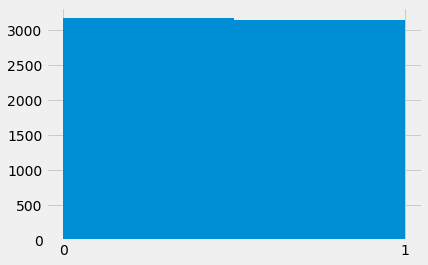

In [17]:
num_vars = df_train2.select_dtypes(['int64', 'float64']).columns
X = df_train2[num_vars]
y = df_train2.RainBool

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred = np.where(y_pred==True, 1, 0)

plt.hist(y_pred, bins=2)
plt.xticks(range(0, 2))
plt.show()

In [18]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%")

Accuracy: 72.4%


In [19]:
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion.columns.name = "Pred"
df_confusion

Pred,0,1
RainBool,,
False,2321,891
True,855,2260


In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.73      0.72      0.73      3212
        True       0.72      0.73      0.72      3115

    accuracy                           0.72      6327
   macro avg       0.72      0.72      0.72      6327
weighted avg       0.72      0.72      0.72      6327



As shown by the result metrics, the algorithm is definitely performing some classifications correctly, but at ~73% accuracy, it is ok, but I'm hoping to do better. Next, the imputed data set, which was setup in the exact same way as df_train2, except the dropna has been replaced with fillna:

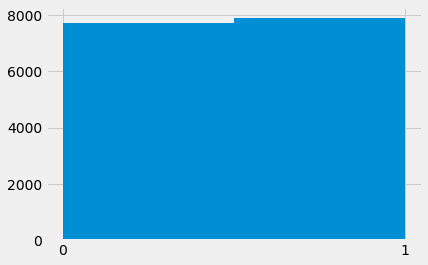

In [173]:
train_data3 = '/home/kebin/Syracuse/Syracuse/CIS600/HW2/WeatherForecastTraining.csv'
df_train3 = pd.read_csv(train_data3, sep=',')
df_3 = pd.DataFrame(df_train3)
df_3['RainTomorrow'] = df_3['RainTomorrow'].astype('category').cat.codes
df_train3['RainToday'] = df_train3['RainToday'].map(dict(Yes=1, No=0))
df_train3.fillna(df_train3.mean(), inplace=True)
df_train3['RainBool'] = np.where(df_train3['RainTomorrow']==1,True,False)
df_train3.RainBool=='True'


num_vars2 = df_train3.select_dtypes(['int64', 'float64']).columns
X_3 = df_train3[num_vars2]
y_3 = df_train3.RainBool

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=16)

clf_3 = DecisionTreeClassifier()
clf_3.fit(X_train_3, y_train_3)

y_pred_3 = clf.predict(X_test_3)
y_pred_3 = np.where(y_pred_3==True, 1, 0)

plt.hist(y_pred_3, bins=2)
plt.xticks(range(0, 2))
plt.show()

In [174]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test_3, y_pred_3)*100, 2)}%")

Accuracy: 75.62%


In [175]:
df_confusion_3 = pd.crosstab(y_test_3, y_pred_3)
df_confusion_3.columns.name = "Pred"
df_confusion_3

Pred,0,1
RainBool,,
False,5906,1997
True,1805,5886


Interesting results! Not only is the accuracy better, but it is classifying nearly twice as much data. This is very telling for two reasons: one, this is the more accurately trained model which I will use for the prediction, and two it helps justify the decision to impute the missing data on the testing set as well.

## 4.2 Grid Search
In an effort to maximize performance, I will use a gird search as provided by scikit learn. The idea is that is should take the same dataset and same data split and optimize the hyper-parameters to provide the best classification accuracy.

The criteria that I will use to determine accuracy will be given through cross validation. In this way, we can "double check" the results across the available data.

In [176]:
#Set up the grid search for a decision tree approach
sc = StandardScaler()
pca = decomposition.PCA()
decisiontree = tree.DecisionTreeClassifier()

# Create a pipeline for the tree
pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('decisiontree', decisiontree)])

#Set the parameters to test
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]
parameters = dict(pca__n_components=n_components,
                  decisiontree__criterion=criterion,
                  decisiontree__max_depth=max_depth)

#Check best parameters
clf_G = GridSearchCV(pipe, parameters)
clf_G.fit(X_3, y_3)

#View The Best Parameters
print('Best Criterion:', clf_G.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf_G.best_estimator_.get_params()['decisiontree__max_depth'])
print('Best Number Of Components:', clf_G.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_G.best_estimator_.get_params()['decisiontree'])

#Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf_3, X_3, y_3, cv=4, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 11

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[0.53728357 0.71350519 0.70617208 0.5734185 ]

0.6325948362943491

0.07833609127369646


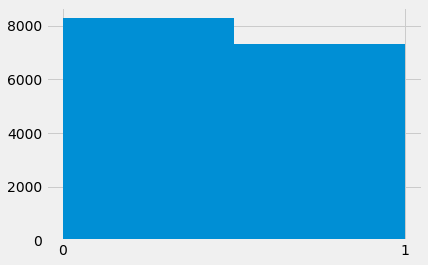

In [183]:
#Create a new algorithm based on optimized grid search parameters
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf2.fit(X_train_3, y_train_3)
y_pred2 = clf2.predict(X_test_3)
y_pred2 = np.where(y_pred2==True, 1, 0)

plt.hist(y_pred2, bins=2)
plt.xticks(range(0, 2))
plt.show()

In [184]:
print(f"Updated Accuracy: {round(metrics.accuracy_score(y_test_3, y_pred2)*100, 2)}%")

Updated Accuracy: 76.41%


In [185]:
df_confusion = pd.crosstab(y_test_3, y_pred2)
df_confusion.columns.name = "Pred"
df_confusion

Pred,0,1
RainBool,,
False,6252,1651
True,2027,5664


In [180]:
print(metrics.classification_report(y_test_3, y_pred2))

              precision    recall  f1-score   support

       False       0.76      0.79      0.77      7903
        True       0.77      0.74      0.76      7691

    accuracy                           0.76     15594
   macro avg       0.76      0.76      0.76     15594
weighted avg       0.76      0.76      0.76     15594



After running a grid search, we can see the optimal parameters are a criterion of gini, and a max depth of 6. The remaining parameters did not need to be altered from the default values. After the modifications, the prediction accuracy rose modestly, and we will use this model for our predictions

# 5 Prediction <a class="anchor" id="Prediction"></a>
With our optimized decision tree, I will rerun the algorithm only this time I will train on 100% of the training data and apply the results to the testing data. To show the results, I will add the requested new column "DT" that will display the results of my model.

To address the large amounts of missing data from the test set, I do not want to simply delete these rows. With the training data, I still had plenty of rows leftover to test on and derive an accurate model. But for predictive purposes, I do not wish to ignore over half of the data.

Instead, I will fill out the missing values with the mean for each respective column. As seen in the training data set comparisons, this approach makes sense.

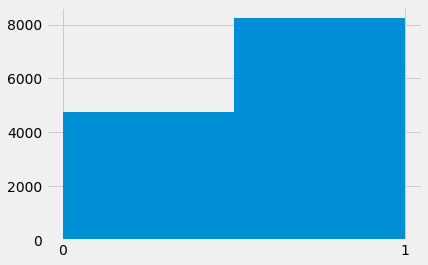

In [181]:
#Apply optimized algorithm, clf2, to testing data
#Add one dummy row to allow for 100% test split
dummy_row = df_test.iloc[[0]]
df_test = df_test.append(dummy_row)

df_test['RainToday'] = df_test['RainToday'].map(dict(Yes=1, No=0))
df_test.fillna(df_test.mean(), inplace=True)
df_test['DT'] = 0
X2 = df_test[num_vars]
y2 = df_test.DT

#Allow testing data to be 100%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=12994, random_state=61)

clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf3.fit(X_train2, y_train2)

y_predF = clf2.predict(X_test2)
y_predF = np.where(y_pred3==True, 1, 0)
df_test['DT'] = pd.Series(y_predF)

plt.hist(y_predF, bins=2)
plt.xticks(range(0, 2))
plt.show()

In [182]:
#Export the final CSV File
#Delete dummy row
df_test = df_test[:-1]
df_test['DT'] = df_test['DT'].map({1 : 'Yes', 0 : 'No'})
df_test.to_csv('/home/kebin/Syracuse/Syracuse/CIS600/HW2/testKM.csv', float_format='%.2f', columns=['ID', 'DT'])

# 6. Conclusion <a class="anchor" id="Conclusion"></a>
Quickly, we can see that the number of days that are predicted to rain vastly outnumber those that are not, almost 2:1. We've arrived at this using a model that is ~76% accurate, which we've derived from two different approaches to training as well as a grid search to optimize the parameters on the best performing model. Finally, we've printed the results to a CSV file on the test data set, which the model did not see prior to making any predictions.